In [25]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import matplotlib.pyplot as plt
from scipy import linalg
# from scipy.stats import binomtest, binom_gen

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x0000016D09321BD0>
2.718281828459045
-0.0
-2.718281828459045


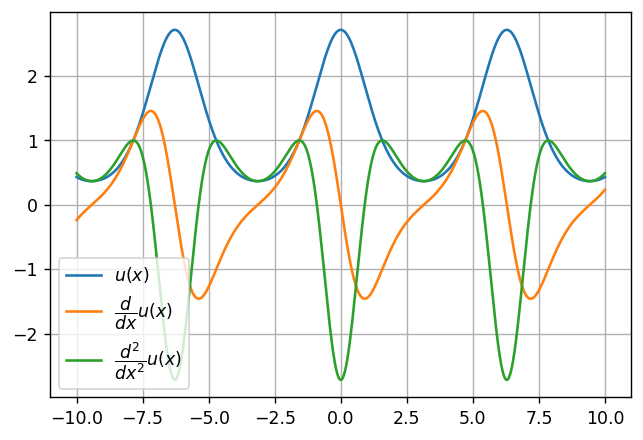

In [3]:
u = lambda x: np.exp(np.cos(x))

x = np.linspace(-10, 10, 1001, dtype=np.float64)
up = elementwise_grad(u)
upp = elementwise_grad(up)
print(up)
fig, ax = plt.subplots(dpi=125, figsize=(6,4))
ax.plot(x, u(x), label = "$u(x)$")
ax.plot(x, up(x), label = r"$\dfrac{d}{dx}u(x)$")
ax.plot(x, upp(x), label = r"$\dfrac{d^2}{dx^2}u(x)$")

ax.grid()
ax.legend()

for func in [u, up, upp]:
    print(func(0.))

In [4]:
from sympy import init_session, factorial, summation, symbols, diff, Function, O, latex
from IPython.display import display, Math
# from scipy.special import factorial
init_session()

IPython console for SymPy 1.12 (Python 3.10.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

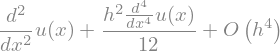

In [5]:
j, h, a = symbols("j h alpha")
u = Function("u")

def taylor(func, var, k, J):
    return sum( (J*h)**n / (factorial(n)) * diff(func(var), var, n) + O(h**(k+1)) for n in range(k+1))

u_m = taylor(u, x, 5, j-1)
u_p = taylor(u, x, 5, j+1)
u_0 = taylor(u, x, 5,  j )

res = (u_m - 2*u_0 + u_p) / h**2
def coeff(n):
    return ((j-1)**n - 2*j**n + (j+1)**n).simplify()

for n in range(6):
    display(Math(rf"\alpha_{n} =" + latex(coeff(n))))
display(res.subs(j, 0).simplify())
# sum(coeff(n) * h**n * diff(u(x), x, n) / factorial(n) for n in range(6)).subs(j, 1) / h**2

# Exericse 2.b)

## b) Solve equation using Newton's method

$$\begin{align*}
    \epsilon u'' + u(u' -1) = 0, &\quad 0\leq t \leq 1, \\
    u(0) = \alpha, &\quad u(1) = \beta, \\
    \alpha = -1, \quad \beta = 1.5, &\quad \epsilon = 0.1
\end{align*}$$

In [32]:
N = 10
alpha, beta = -1, 1.5
epsilon = 0.1
h = 1 / (N)

A = 1/h**2 * (-2*np.identity(N-1, dtype=np.float64) + np.diag(np.ones(N-2), -1) + np.diag(np.ones(N-2), 1))

f = np.zeros(N-1)
f[0] = -alpha/h**2
f[-1] = -beta/h**2

# Our initial guess
# u(x) ~ x - xbar + w0 * tanh(w0(x-xbar)/2*epsilon)
with np.printoptions(formatter={"all": lambda x: f"{x:.3f}"}, linewidth=100):
    print(linalg.solve(A, f))


[-0.750 -0.500 -0.250 -0.000 0.250 0.500 0.750 1.000 1.250]
